<a href="https://colab.research.google.com/github/michaelMondoro/tweet_lens/blob/main/TwitSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import nltk
# nltk.download('twitter_samples')
# nltk.download('punkt')
from nltk.corpus import twitter_samples
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

In [91]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
total = twitter_samples.strings('tweets.20150430-223406.json')

In [18]:
# Packages to test 
# vaderSentiment, textblob, nltk

# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

In [132]:
# NLTK
# =====
def test_nltk():
  from nltk.sentiment import SentimentIntensityAnalyzer
  analyzer = SentimentIntensityAnalyzer()
  test = [1 for i in range(5000)] 
  test += [0 for i in range(5000)] 
  pred = []

  # Test Positive Tweets
  i = 0
  for tweet in positive_tweets:
    if analyzer.polarity_scores(tweet)['compound'] > 0:
      i+=1
      pred.append(1)
    else:
      pred.append(0)


  # Test negative Tweets
  for tweet in negative_tweets:
    if analyzer.polarity_scores(tweet)['compound'] < 0:
      i+=1
      pred.append(0)
    else:
      pred.append(1)

  cm = confusion_matrix(test,pred)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Pos', 'Neg'])

  cm_display.plot()
  plt.show()
  score = round(i/10000*100,2)
  print(f"{round(metrics.precision_score(test,pred),2)} precision score")
  print(f"{round(metrics.recall_score(test,pred),2)} recall score")
  print(f"{round(metrics.f1_score(test,pred),2)} F1 score")
  print(f"{score}% accuracy")



In [133]:
# textblob
# ========
def test_textblob():
  from textblob import TextBlob
  test = [1 for i in range(5000)] 
  test += [0 for i in range(5000)] 
  pred = []

  # Test positive tweets
  i = 0
  for tweet in positive_tweets:
    blob = TextBlob(tweet)
    if blob.polarity > 0:
        i+=1
        pred.append(1)
    else:
      pred.append(0)

  # Test negative tweets
  for tweet in negative_tweets:
    blob = TextBlob(tweet)
    if blob.polarity < 0:
        i += 1
        pred.append(0)
    else:
      pred.append(1)
    
  cm = confusion_matrix(test,pred)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Pos', 'Neg'])

  cm_display.plot()
  plt.show()

  score = round(i/10000*100,2)
  print(f"{round(metrics.precision_score(test,pred),2)} precision score")
  print(f"{round(metrics.recall_score(test,pred),2)} recall score")
  print(f"{round(metrics.f1_score(test,pred),2)} F1 score")
  print(f"{score}% accuracy")

In [134]:
, precision_score
# vader
# ========
def test_vader():
  from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
  analyzer = SentimentIntensityAnalyzer()
  test = [1 for i in range(5000)] 
  test += [0 for i in range(5000)] 
  pred = []

  # Test Positive Tweets
  i = 0
  for tweet in positive_tweets:
    if analyzer.polarity_scores(tweet)['compound'] > 0:
      i+=1
      pred.append(1)
    else:
      pred.append(0)


  # Test negative Tweets
  for tweet in negative_tweets:
    if analyzer.polarity_scores(tweet)['compound'] < 0:
      i+=1
      pred.append(0)
    else:
      pred.append(1)

  score = round(i/10000*100,2)
  cm = confusion_matrix(test,pred)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Pos', 'Neg'])

  cm_display.plot()
  plt.show()
  print(f"{round(metrics.precision_score(test,pred),2)} precision score")
  print(f"{round(metrics.recall_score(test,pred),2)} recall score")
  print(f"{round(metrics.f1_score(test,pred),2)} F1 score")
  print(f"{score}% accuracy")

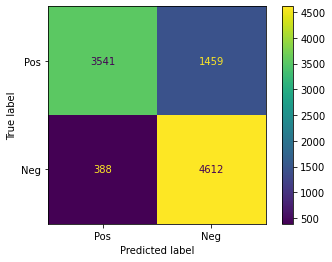

0.76 precision score
0.92 recall score
0.83 F1 score
81.53% accuracy


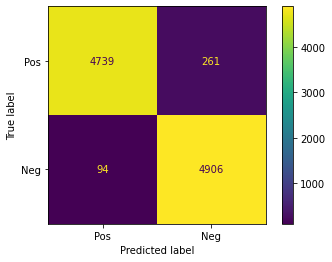

0.95 precision score
0.98 recall score
0.97 F1 score
96.45% accuracy


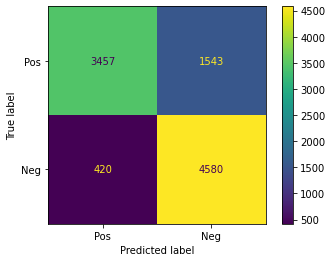

0.75 precision score
0.92 recall score
0.82 F1 score
80.37% accuracy


In [135]:
test_nltk()
test_textblob()
test_vader()